# Hill Climbing (First-Choice) per funzioni continue
Caso di una funzione continua ad una variabile.

In [1]:
from numpy import asarray
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from matplotlib import pyplot

## Definizione della Funzione Obiettivo 
Scegliamo la seguente funzione ad una variabile per il nostro algoritmo:$$f(x) = x^2$$

In [2]:
# funzione obiettivo
def objective(x):
    return x[0]**2.0

## Visualizzazione della Funzione Obiettivo 

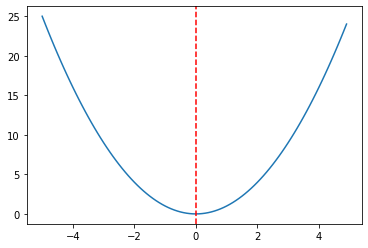

In [3]:
# definizione range per l'input
r_min, r_max = -5.0, 5.0
# campionamento uniforme dell'intervallo di input con incrementi di 0.1 
inputs = arange(r_min, r_max, 0.1)
# calcolo valori funzione obiettivo
results = [objective([x]) for x in inputs]
# creazione line plot valori funzione 
pyplot.plot(inputs, results)
# definizione del punto di ottimo globale (che è il punto x = 0.)
x_optima = 0.0
# disegno di una linea verticale corispondente al punto di ottimo  
pyplot.axvline(x=x_optima, ls='--', color='red'); 
#pyplot.show()

## Algoritmo Hill Climbing

In [4]:
def hill_climbing(objective, bounds, n_iterations, step_size):
    
    # generazione random stato iniziale
    current = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # valutazione stato iniziale
    current_eval = objective(current)
    
    # run the hill climb
    for i in range(n_iterations):
        # generazione random stato successore
        next_state = current + randn(len(bounds)) * step_size
        # valutazione stato successore
        next_state_eval = objective(next_state)
        # confronto valutazioni di current e next
        if next_state_eval <= current_eval:
            # next diventa il nuovo stato corrente
            current, current_eval = next_state, next_state_eval
            # report avanzamento elaborazione
            print('>%d f(%s) = %.5f' % (i, current, current_eval))
    return [current, current_eval]


## Impostazione Parametri

In [5]:
# seed per il generatore di numeri pseudocasuali
seed(5)
# definizione range per l'input
bounds = asarray([[-5.0, 5.0]])
# definizione  totale iterazioni
n_iterations = 1000
# definizione massimo step size
step_size = 0.1

## Esecuzione Algoritmo

In [6]:
best, score = hill_climbing(objective, bounds, n_iterations, step_size)

print('Done!')
print('f(%s) = %f' % (best, score))

>1 f([-2.74290923]) = 7.52355
>3 f([-2.65873147]) = 7.06885
>4 f([-2.52197291]) = 6.36035
>5 f([-2.46450214]) = 6.07377
>7 f([-2.44740961]) = 5.98981
>9 f([-2.28364676]) = 5.21504
>12 f([-2.19245939]) = 4.80688
>14 f([-2.01001538]) = 4.04016
>15 f([-1.86425287]) = 3.47544
>22 f([-1.79913002]) = 3.23687
>24 f([-1.57525573]) = 2.48143
>25 f([-1.55047719]) = 2.40398
>26 f([-1.51783757]) = 2.30383
>27 f([-1.49118756]) = 2.22364
>28 f([-1.45344116]) = 2.11249
>30 f([-1.33055275]) = 1.77037
>32 f([-1.17805016]) = 1.38780
>33 f([-1.15189314]) = 1.32686
>36 f([-1.03852644]) = 1.07854
>37 f([-0.99135322]) = 0.98278
>38 f([-0.79448984]) = 0.63121
>39 f([-0.69837955]) = 0.48773
>42 f([-0.69317313]) = 0.48049
>46 f([-0.61801423]) = 0.38194
>48 f([-0.48799625]) = 0.23814
>50 f([-0.22149135]) = 0.04906
>54 f([-0.20017144]) = 0.04007
>57 f([-0.15994446]) = 0.02558
>60 f([-0.15492485]) = 0.02400
>61 f([-0.03572481]) = 0.00128
>64 f([-0.03051261]) = 0.00093
>66 f([-0.0074283]) = 0.00006
>78 f([-0.00202

## Algoritmo Hill Climbing con Score

In [7]:
def hill_climbing_score(objective, bounds, n_iterations, step_size):
    
    # generazione random stato iniziale
    current = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # valutazione stato iniziale
    current_eval = objective(current)
    
    # run the hill climb
    scores = list()
    scores.append(current_eval)
    for i in range(n_iterations):
        # generazione random stato successore
        next_state = current + randn(len(bounds)) * step_size
        # valutazione stato successore
        next_state_eval = objective(next_state)
        # confronto valutazioni di current e next
        if next_state_eval <= current_eval:
            # next diventa il nuovo stato corrente
            current, current_eval = next_state, next_state_eval
            # teniamo traccia della valutazione
            scores.append(current_eval)
            # report avanzamento elaborazione
            print('>%d f(%s) = %.5f' % (i, current, current_eval))
    return [current, current_eval, scores]


## Impostazione Parametri

In [8]:
# seed per il generatore di numeri pseudocasuali
seed(5)
# definizione range per l'input
bounds = asarray([[-5.0, 5.0]])
# definizione  totale iterazioni
n_iterations = 1000
# definizione step size
step_size = 0.1

## Esecuzione Algoritmo con Score

In [9]:
best, score, scores = hill_climbing_score(objective, bounds, n_iterations, step_size) 

print('Done!')
print('f(%s) = %f' % (best, score))

>1 f([-2.74290923]) = 7.52355
>3 f([-2.65873147]) = 7.06885
>4 f([-2.52197291]) = 6.36035
>5 f([-2.46450214]) = 6.07377
>7 f([-2.44740961]) = 5.98981
>9 f([-2.28364676]) = 5.21504
>12 f([-2.19245939]) = 4.80688
>14 f([-2.01001538]) = 4.04016
>15 f([-1.86425287]) = 3.47544
>22 f([-1.79913002]) = 3.23687
>24 f([-1.57525573]) = 2.48143
>25 f([-1.55047719]) = 2.40398
>26 f([-1.51783757]) = 2.30383
>27 f([-1.49118756]) = 2.22364
>28 f([-1.45344116]) = 2.11249
>30 f([-1.33055275]) = 1.77037
>32 f([-1.17805016]) = 1.38780
>33 f([-1.15189314]) = 1.32686
>36 f([-1.03852644]) = 1.07854
>37 f([-0.99135322]) = 0.98278
>38 f([-0.79448984]) = 0.63121
>39 f([-0.69837955]) = 0.48773
>42 f([-0.69317313]) = 0.48049
>46 f([-0.61801423]) = 0.38194
>48 f([-0.48799625]) = 0.23814
>50 f([-0.22149135]) = 0.04906
>54 f([-0.20017144]) = 0.04007
>57 f([-0.15994446]) = 0.02558
>60 f([-0.15492485]) = 0.02400
>61 f([-0.03572481]) = 0.00128
>64 f([-0.03051261]) = 0.00093
>66 f([-0.0074283]) = 0.00006
>78 f([-0.00202

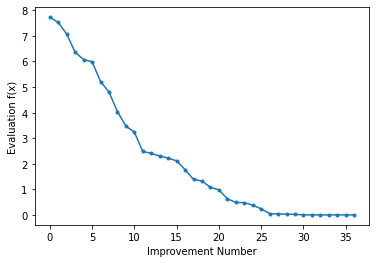

In [10]:
# line plot dei best scores
pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)');
#pyplot.show()